**ELEVATE LABS AI/ML INTERNSHIP TASK 8**

*📓 Task 8:  K-Means Clustering — Mall Customers Dataset*

We’ll cluster mall customers based on features (Annual Income, Spending Score), determine the best K using the Elbow Method, and evaluate using Silhouette Score.

In [8]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [10]:
# 2. Load & prepare data
df = pd.read_csv("Mall_Customers.csv")

# Drop ID column
df.drop("CustomerID", axis=1, inplace=True)

# We'll cluster using Annual Income and Spending Score
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


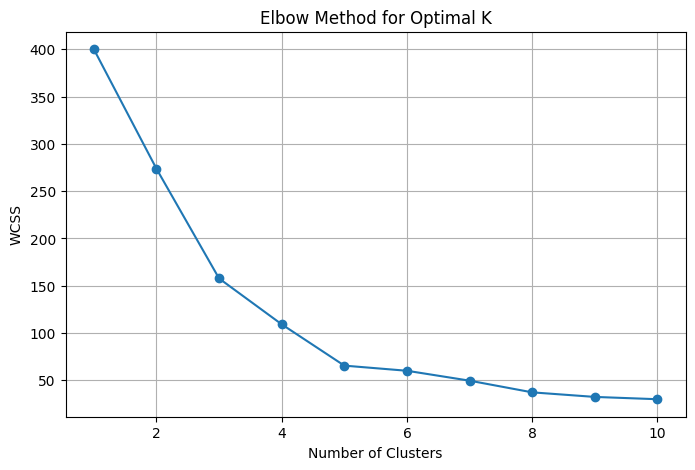

In [11]:
# 3. Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [12]:
# 4. Fit KMeans with optimal K (e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

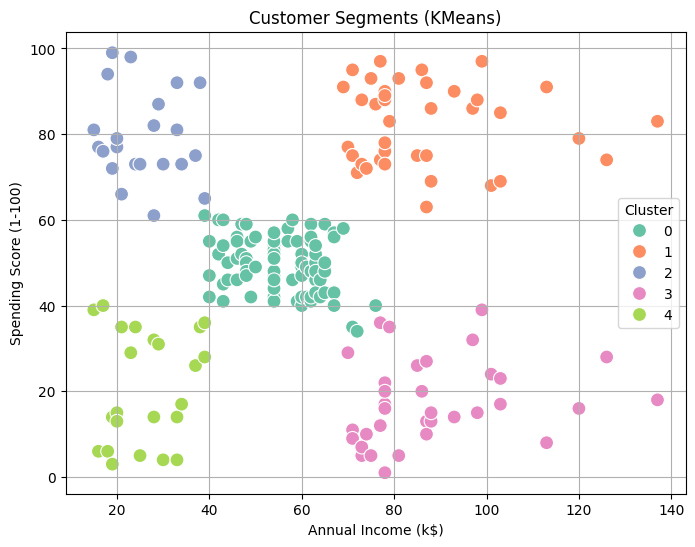

In [13]:
# 5. Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments (KMeans)")
plt.grid(True)
plt.show()


In [14]:
# 6. Evaluate with Silhouette Score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.555
